# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Import libraries

%tensorflow_version 2.x

import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

TensorFlow 2.x selected.


In [0]:
# Load pickled data

training_file = "/content/train.p"
validation_file= "/content/valid.p"
testing_file = "/content/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

	Sample Training Images



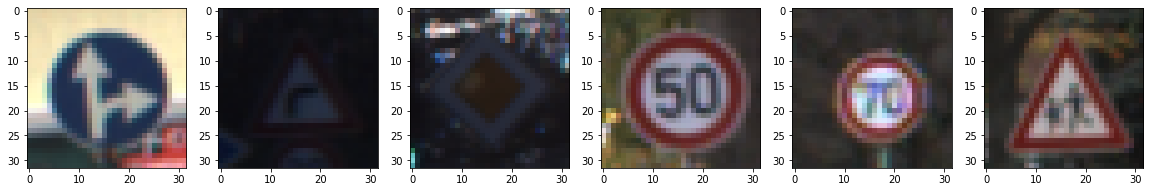



	Image Class Distributions



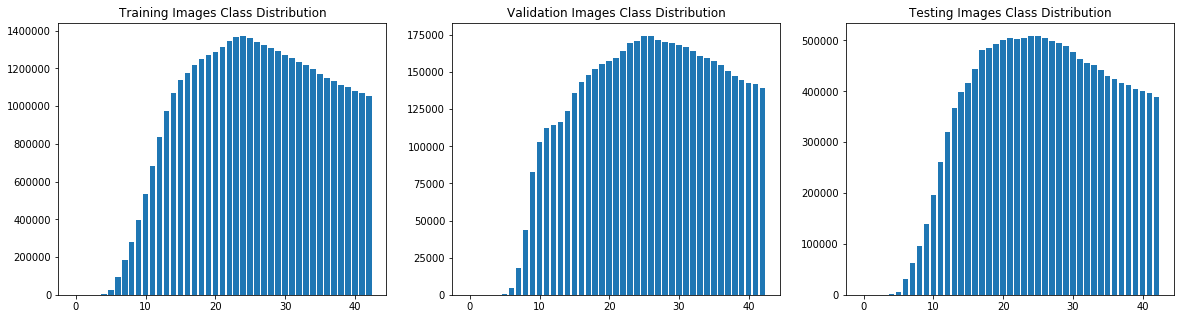

In [6]:
# Plot random examples of traffic signs

print("\tSample Training Images\n")
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
for row in ax:
    rand_img = np.random.randint(0, n_train)
    row.imshow(X_train[rand_img])
plt.show()

# Plot distribution of traffic sign images in training and validation set

train_distribution = []
for y in range(n_classes):
    train_distribution.append((X_train == y).sum())
val_distribution = []
for x in range(n_classes):
    val_distribution.append((X_valid == x).sum())
test_distribution = []
for z in range(n_classes):
    test_distribution.append((X_test == z).sum())

print("\n\n\tImage Class Distributions\n")
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("Training Images Class Distribution")
plt.bar(list(range(n_classes)), train_distribution)
plt.subplot(1, 3, 2)
plt.title("Validation Images Class Distribution")
plt.bar(list(range(n_classes)), val_distribution)
plt.subplot(1, 3, 3)
plt.title("Testing Images Class Distribution")
plt.bar(list(range(n_classes)), test_distribution)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
# Convert all images to gray scale

X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)

print("Shape of training images: {}".format(X_train.shape))
print("Shape of validation images: {}".format(X_valid.shape))
print("Shape of test images: {}".format(X_test.shape))

Shape of training images: (34799, 32, 32, 1)
Shape of validation images: (4410, 32, 32, 1)
Shape of test images: (12630, 32, 32, 1)


	Sample Training Images



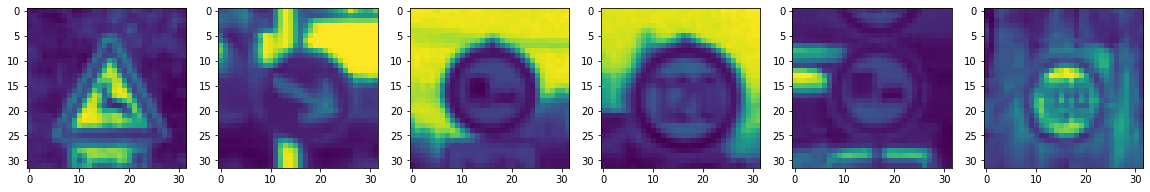


	Sample Validation Images



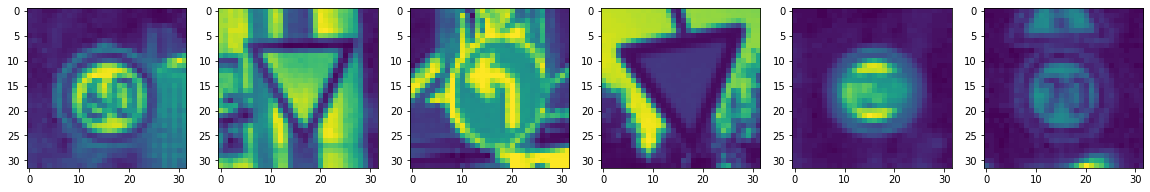


	Sample Testing Images



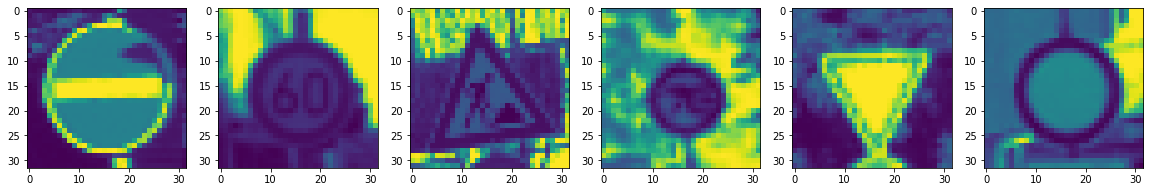

In [8]:
# Visualize gray scale training images

print("\tSample Training Images\n")
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
for row in ax:
    rand_img = np.random.randint(0, n_train)
    row.imshow(np.squeeze(X_train[rand_img]))
plt.show()

print("\n\tSample Validation Images\n")
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
for row in ax:
    rand_img = np.random.randint(0, n_validation)
    row.imshow(np.squeeze(X_valid[rand_img]))
plt.show()

print("\n\tSample Testing Images\n")
fig, ax = plt.subplots(1, 6, figsize=(20, 20))
for row in ax:
    rand_img = np.random.randint(0, n_test)
    row.imshow(np.squeeze(X_test[rand_img]))
plt.show()

### Model Architecture

In [0]:
# Epoch callback class

class epochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_accuracy") > 0.995:
            print("\nAccuracy is currently: {}. Stopping training ..."
                .format(str(logs.get("accuracy"))))
            self.model.stop_training = True

In [0]:
# Create the model

model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(28, (3, 3), activation="relu", input_shape=(32, 32, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(150, activation="relu"),
            tf.keras.layers.Dense(150, activation="relu"),
            tf.keras.layers.Dense(150, activation="relu"),
            tf.keras.layers.Dense(150, activation="relu"),
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dense(43, activation="softmax")
        ])

In [65]:
# Model summary

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 28)        280       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 28)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 32)        8096      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 150)               172950    
_________________________________________________________________
dense_47 (Dense)             (None, 150)             

In [0]:
# Compile the model

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [67]:
# Fit the model

history = model.fit(X_train, y_train, epochs=20, callbacks=[epochCallback()], validation_data=(X_valid, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 5s 158us/sample - loss: 0.8567 - accuracy: 0.7609 - val_loss: 0.4093 - val_accuracy: 0.8857
Epoch 2/20
34799/34799 [==============================] - 5s 145us/sample - loss: 0.2096 - accuracy: 0.9418 - val_loss: 0.3272 - val_accuracy: 0.9186
Epoch 3/20
34799/34799 [==============================] - 5s 141us/sample - loss: 0.1372 - accuracy: 0.9631 - val_loss: 0.3580 - val_accuracy: 0.9206
Epoch 4/20
34799/34799 [==============================] - 5s 140us/sample - loss: 0.1110 - accuracy: 0.9715 - val_loss: 0.3515 - val_accuracy: 0.9324
Epoch 5/20
34799/34799 [==============================] - 5s 138us/sample - loss: 0.0947 - accuracy: 0.9748 - val_loss: 0.2221 - val_accuracy: 0.9544
Epoch 6/20
34799/34799 [==============================] - 5s 138us/sample - loss: 0.0827 - accuracy: 0.9794 - val_loss: 0.2743 - val_accuracy: 0.9415
Epoch 7/20
34799/34799 [===========================

In [68]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

12630/12630 [==============================] - 1s 83us/sample - loss: 0.4802 - accuracy: 0.9301


[0.48024503692910653, 0.9300871]

In [69]:
# Evaluate the model on the validation set

model.evaluate(X_valid, y_valid)

4410/4410 [==============================] - 0s 82us/sample - loss: 0.4343 - accuracy: 0.9449


[0.43427080566219795, 0.94489795]

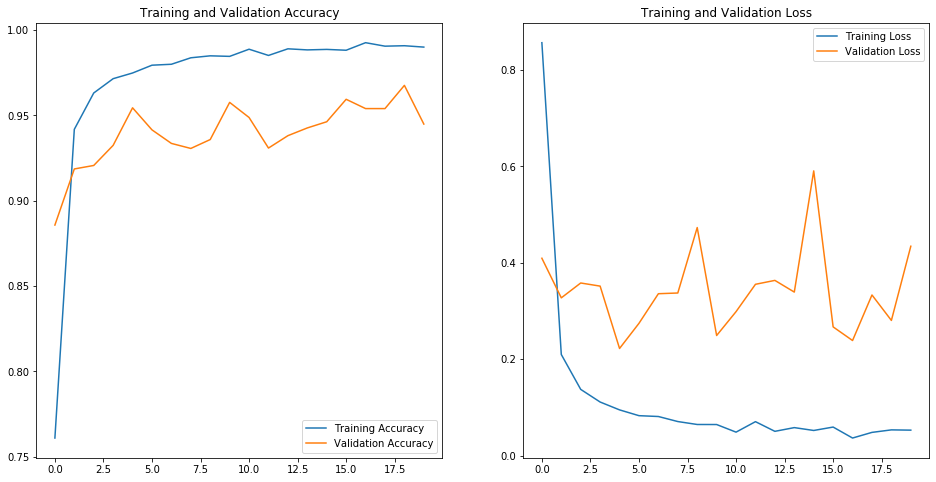

In [70]:
# Visualize training and validation accuracy and loss

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.title('Training and Validation Accuracy')
plt.plot(range(20), train_acc, label = 'Training Accuracy')
plt.plot(range(20), validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(range(20), train_loss, label = 'Training Loss')
plt.plot(range(20), validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [0]:
from PIL import Image

# Load and preprocess the images
# Img 1 - Speed Limit - 30 [1]
speed_30_path = "/content/speed_30.ppm"
speed_30_path_img = Image.open(speed_30_path)
speed_30 = np.asarray(speed_30_path_img.resize((32, 32)))
speed_30 = np.sum(speed_30/3, axis=2, keepdims=True)
speed_30 = np.reshape(speed_30, (1, 32, 32, 1))

# Img 2 - Turn Right Ahead [33]
turn_right_path = "/content/turn_right.ppm"
turn_right_path_img = Image.open(turn_right_path)
turn_right = np.asarray(turn_right_path_img.resize((32, 32)))
turn_right = np.sum(turn_right/3, axis=2, keepdims=True)
turn_right = np.reshape(turn_right, (1, 32, 32, 1))

# Img 3 - Stop [14]
stop_path = "/content/stop.ppm"
stop_path_img = Image.open(stop_path)
stop = np.asarray(stop_path_img.resize((32, 32)))
stop = np.sum(stop/3, axis=2, keepdims=True)
stop = np.reshape(stop, (1, 32, 32, 1))

# Img 4 - No Entry [17]
no_entry_path = "/content/no_entry.ppm"
no_entry_path_img = Image.open(no_entry_path)
no_entry = np.asarray(no_entry_path_img.resize((32, 32)))
no_entry = np.sum(no_entry/3, axis=2, keepdims=True)
no_entry = np.reshape(no_entry, (1, 32, 32, 1))

# Img 5 - Speed Limit - 50 [2]
speed_50_path = "/content/speed_50.ppm"
speed_50_path_img = Image.open(speed_50_path)
speed_50 = np.asarray(speed_50_path_img.resize((32, 32)))
speed_50 = np.sum(speed_50/3, axis=2, keepdims=True)
speed_50 = np.reshape(speed_50, (1, 32, 32, 1))

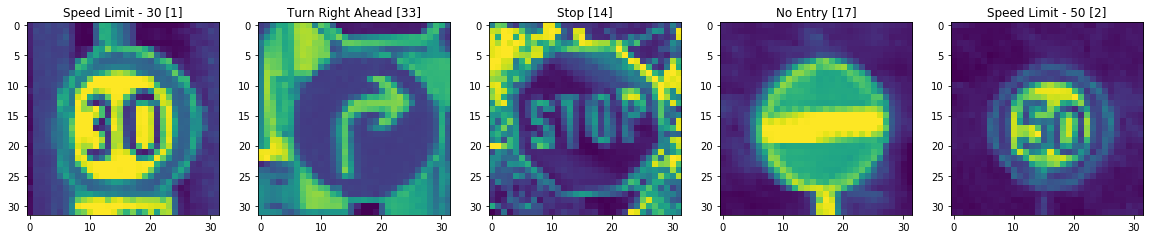

In [120]:
# Plot the images loaded from the web

plt.figure(figsize=(20, 20))

plt.subplot(1, 5, 1)
plt.title("Speed Limit - 30 [1]")
plt.imshow(np.squeeze(speed_30))
plt.subplot(1, 5, 2)
plt.title("Turn Right Ahead [33]")
plt.imshow(np.squeeze(turn_right))
plt.subplot(1, 5, 3)
plt.title("Stop [14]")
plt.imshow(np.squeeze(stop))
plt.subplot(1, 5, 4)
plt.title("No Entry [17]")
plt.imshow(np.squeeze(no_entry))
plt.subplot(1, 5, 5)
plt.title("Speed Limit - 50 [2]")
plt.imshow(np.squeeze(speed_50))

plt.show()

### Predict the Sign Type for Each Image

In [138]:
# Image Prediction

speed_30_pred = model.predict_classes(speed_30)[0]
turn_right_pred = model.predict_classes(turn_right)[0]
stop_pred = model.predict_classes(stop)[0]
no_entry_pred = model.predict_classes(no_entry)[0]
speed_50_pred = model.predict_classes(speed_50)[0]

print("Speed Limit(30 km/hr) prediction: {}  || Actual class: 1".format(speed_30_pred))
print("Turn Right Ahead prediction: {}      || Actual class: 33".format(turn_right_pred))
print("Stop prediction: {}                  || Actual class: 14".format(stop_pred))
print("No entry prediction: {}              || Actual class: 17".format(no_entry_pred))
print("Speed Limit(50 km/hr) prediction: {}  || Actual class: 2".format(speed_50_pred))

Speed Limit(30 km/hr) prediction: 1  || Actual class: 1
Turn Right Ahead prediction: 33      || Actual class: 33
Stop prediction: 14                  || Actual class: 14
No entry prediction: 17              || Actual class: 17
Speed Limit(50 km/hr) prediction: 2  || Actual class: 2


### Analyze Performance

In [140]:
# Calculate prediction accuracy

accuracy = 0

if speed_30_pred == 1 : accuracy += 20
if turn_right_pred == 33 : accuracy += 20
if stop_pred == 14 : accuracy += 20
if no_entry_pred == 17 : accuracy += 20
if speed_50_pred == 2 : accuracy += 20

print("Accuracy of the model on web based images: {}%".format(accuracy))

Accuracy of the model on web based images: 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [207]:
import heapq

# Top 5 softmax probabilities on web based images

print("Speed(30 km/hr) softmax predictions:")
speed_30_softmax = ["%.20f" % prob for prob in heapq.nlargest(5, model.predict(speed_30)[0]) ]
print(speed_30_softmax)

print("\nTurn Right softmax predictions:")
turn_right_softmax = ["%.20f" % prob for prob in heapq.nlargest(5, model.predict(turn_right)[0]) ]
print(turn_right_softmax)

print("\nStop softmax predictions:")
stop_softmax = ["%.20f" % prob for prob in heapq.nlargest(5, model.predict(stop)[0]) ]
print(stop_softmax)

print("\nNo Entry softmax predictions:")
no_entry_softmax = ["%.20f" % prob for prob in heapq.nlargest(5, model.predict(no_entry)[0]) ]
print(no_entry_softmax)

print("\nSpeed(50 km/hr) softmax predictions:")
speed_50_softmax = ["%.20f" % prob for prob in heapq.nlargest(5, model.predict(speed_50)[0]) ]
print(speed_50_softmax)

Speed(30 km/hr) softmax predictions:
['1.00000000000000000000', '0.00000000000001143745', '0.00000000000000082646', '0.00000000000000045272', '0.00000000000000000063']

Turn Right softmax predictions:
['1.00000000000000000000', '0.00000000000000000000', '0.00000000000000000000', '0.00000000000000000000', '0.00000000000000000000']

Stop softmax predictions:
['1.00000000000000000000', '0.00000000000001163216', '0.00000000000000013616', '0.00000000000000000144', '0.00000000000000000002']

No Entry softmax predictions:
['1.00000000000000000000', '0.00000000000057597037', '0.00000000000008549825', '0.00000000000000052696', '0.00000000000000007877']

Speed(50 km/hr) softmax predictions:
['0.99997365474700927734', '0.00001476961097068852', '0.00001031935971695930', '0.00000112767327209440', '0.00000009758969810036']
